**Importing necessary libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Loding csv file**

In [ ]:
df = pd.read_csv('Analysis of Super Store - DA.csv')

**Analysis of dataset-EDA**

In [ ]:
display(df.head())

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
display(df.tail())

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [ ]:
df.shape

(9994, 13)

In [ ]:
summary_stats = df.describe()

In [ ]:
display(summary_stats)

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9977 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Postal Code   9977 non-null   int64  
 6   Region        9977 non-null   object 
 7   Category      9977 non-null   object 
 8   Sub-Category  9977 non-null   object 
 9   Sales         9977 non-null   float64
 10  Quantity      9977 non-null   int64  
 11  Discount      9977 non-null   float64
 12  Profit        9977 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


In [ ]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [ ]:
print(df['Category'].unique())
print(df['Sub-Category'].unique())
print(df['Region'].unique())


['Furniture' 'Office Supplies' 'Technology']
['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']
['South' 'West' 'Central' 'East']


In [ ]:
print(df['Ship Mode'].unique())
print(df['Segment'].unique())
print(df['Country'].unique())

['Second Class' 'Standard Class' 'First Class' 'Same Day']
['Consumer' 'Corporate' 'Home Office']
['United States']


In [ ]:
df.value_counts()

Ship Mode       Segment      Country        City           State       Postal Code  Region   Category         Sub-Category  Sales    Quantity  Discount  Profit   
Standard Class  Consumer     United States  Salem          Oregon      97301        West     Office Supplies  Paper         10.368   2         0.2        3.6288      2
Second Class    Corporate    United States  Chicago        Illinois    60653        Central  Office Supplies  Binders       3.564    3         0.8       -6.2370      2
Standard Class  Consumer     United States  San Francisco  California  94122        West     Office Supplies  Paper         12.840   3         0.0        5.7780      2
                                            Los Angeles    California  90036        West     Office Supplies  Paper         19.440   3         0.0        9.3312      2
Same Day        Home Office  United States  San Francisco  California  94122        West     Office Supplies  Labels        41.400   4         0.0        19.8720    

In [ ]:
missing_values = df.isnull().sum()
display(missing_values)

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [ ]:
df.duplicated().sum()

17

In [ ]:
df.drop_duplicates(subset=None,keep='first',inplace=True)
df.duplicated().sum()

0

**Visualization**

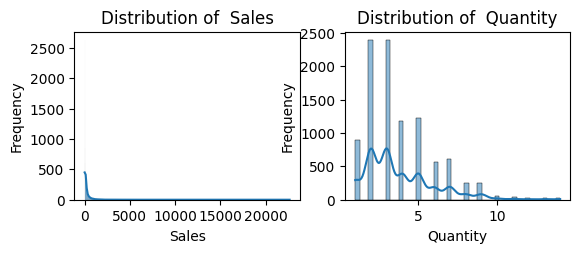

In [ ]:
numerical_cols = ['Sales', 'Quantity']
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of  {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')


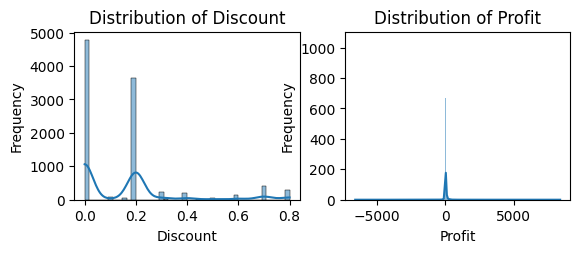

In [ ]:
numerical_cols = [ 'Discount', 'Profit']
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')


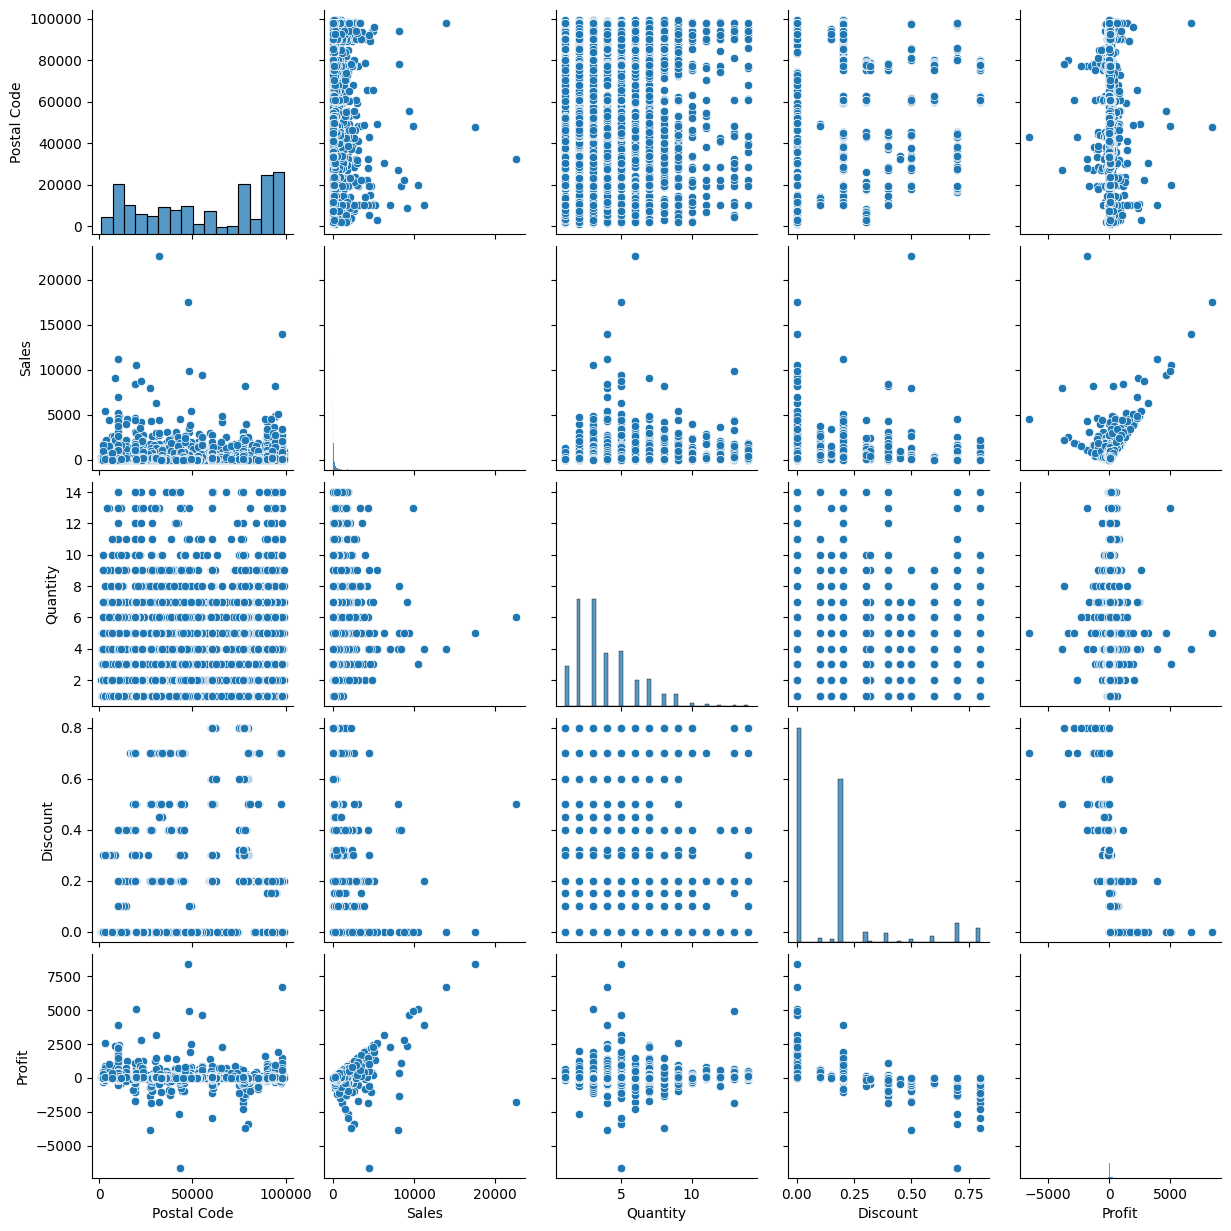

In [ ]:
sns.pairplot(df)

In [ ]:
df['Postal Code'] = df['Postal Code'].astype('object')

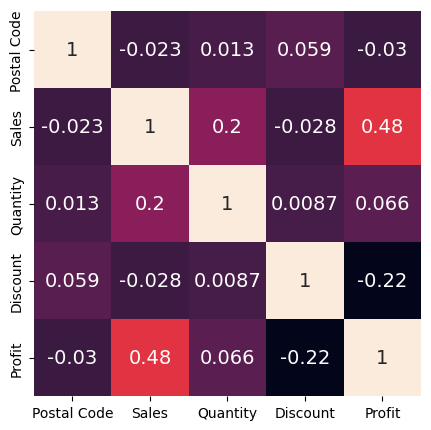

In [79]:
df = pd.get_dummies(df, columns=['Ship Mode'], prefix='ShipMode')
numerical_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(5,5))
sns.heatmap(numerical_df.corr(), annot=True, cbar=False, annot_kws={'size':14})
plt.show()

**Sales vs** **City**

Cities with Highest sales

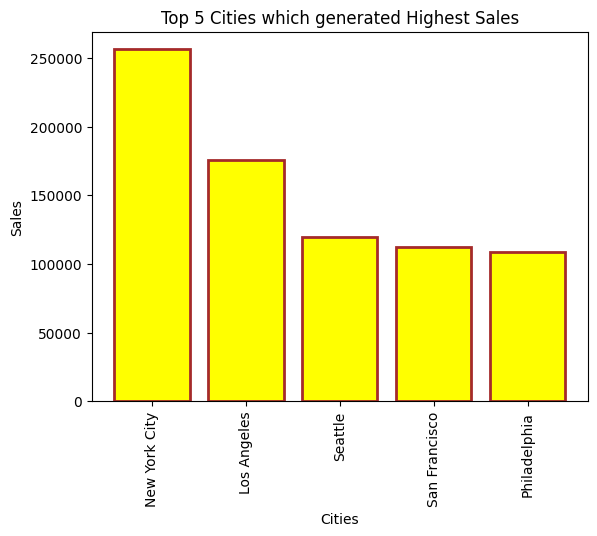

<Figure size 1000x600 with 0 Axes>

In [ ]:
# Assuming 'df' as DataFrame and it has columns "City" and "Sales"
City = df.groupby("City")["Sales"].sum().sort_values(ascending=False).head(5)

plt.title("Top 5 Cities which generated Highest Sales", fontsize=12)
plt.bar(City.index, City.values, color='yellow', edgecolor='brown', linewidth=2)  # Use City.index for city names
plt.xlabel("Cities", fontsize=10)
plt.ylabel("Sales", fontsize=10)
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10)
plt.figure(figsize=(10, 6))
plt.show()

Cities with lowest sales

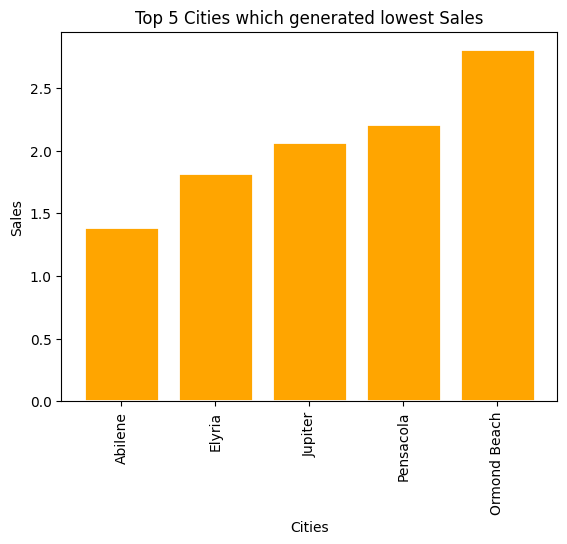

<Figure size 1000x600 with 0 Axes>

In [ ]:
# Assuming 'df' as DataFrame and it has columns "City" and "Sales"
City = df.groupby("City")["Sales"].sum().sort_values(ascending=True).head(5)

plt.title("Top 5 Cities which generated lowest Sales", fontsize=12)
plt.bar(City.index, City.values, color='orange', edgecolor='white', linewidth=2)  # Use City.index for city names
plt.xlabel("Cities", fontsize=10)
plt.ylabel("Sales", fontsize=10)
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10)
plt.figure(figsize=(10, 6))
plt.show()

**Overall Sales Summary**

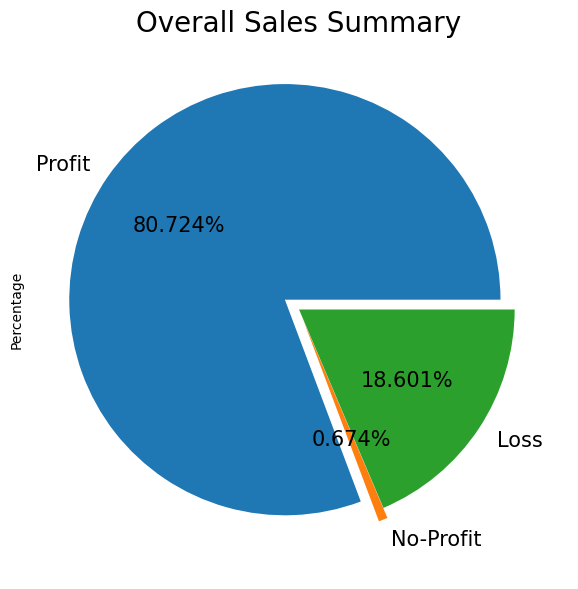

In [ ]:
summary = pd.DataFrame({'Profit':df.Quantity[df.Profit > 0].sum(),
                        'No-Profit':df.Quantity[df.Profit == 0].sum(),
                        'Loss':df.Quantity[(df.Profit) < 0].sum()},
                       index=['Count']).T  # Change {} to [] for the index
plt.title('Overall Sales Summary', fontsize=20)
summary.Count.plot.pie(autopct='%1.3f%%',figsize=(7,7), label='Percentage',
                       textprops = {"fontsize":15}, shadow=False, explode=(0.08,0.05,0))
plt.show()  #displaying sales summary by profit, loss and non-profit

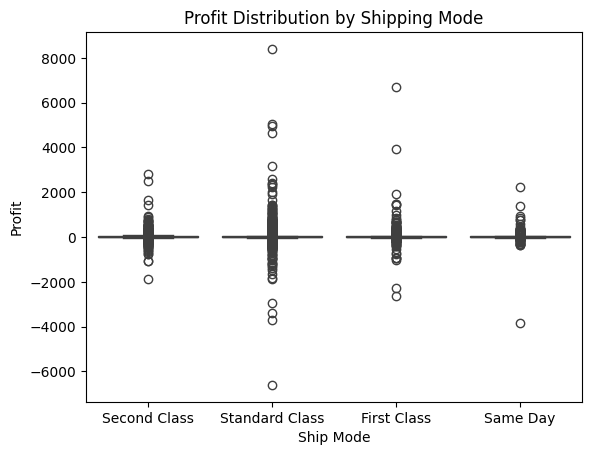

In [ ]:

sns.boxplot(x="Ship Mode", y="Profit", data=df)
plt.title("Profit Distribution by Shipping Mode")
plt.show()

In [ ]:
least_profit_ship_mode = df.groupby('Ship Mode')['Profit'].mean().sort_values().head(1).index[0]
print(f"The ship mode with the least average profit is: {least_profit_ship_mode}")


The ship mode with the least average profit is: Standard Class
